In [22]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [23]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [24]:
plt.rc("font", family="Malgun Gothic")

In [25]:
traffic_accident_rate_20_sql = """
    WITH accident AS (
        SELECT
            age_group, SUM(total_2020) AS total_2020
        FROM
            `calcium-channel-428804-c3.traffic_accident.traffic_accident_5`
        GROUP BY
            age_group
        ),
    license AS (
        SELECT
            age_group, SUM(total) AS total
        FROM
            `calcium-channel-428804-c3.traffic_accident.driver_license_20`
        GROUP BY
            age_group
        )
    SELECT
        A.age_group, (A.total_2020 / B.total) * 100 AS traffic_rate
    FROM
        accident AS A INNER JOIN license AS B
    ON
        A.age_group = B.age_group;
"""

In [26]:
traffic_accident_rate_20_df = client.query(traffic_accident_rate_20_sql).to_dataframe()
traffic_accident_rate_20_df = traffic_accident_rate_20_df.set_index("age_group")

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [27]:
traffic_accident_rate_20_df

,traffic_rate
age_group,
10,2.488773
20,0.608348
30,0.497630
40,0.499312
50,0.683319
60,0.609804
65,0.843744


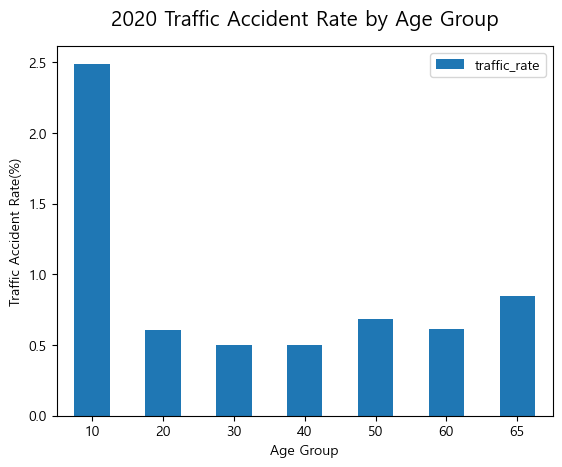

In [28]:
traffic_accident_rate_20_df["traffic_rate"].plot(kind="bar")
plt.title("2020 Traffic Accident Rate by Age Group", size=15, pad=15)
plt.xlabel("Age Group")
plt.ylabel("Traffic Accident Rate(%)")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.savefig("./result/traffic_accident_rate_20.png", bbox_inches='tight')